In [244]:
import pandas as pd
import numpy as np

##Visualization Libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

file = 'lol_data_1.csv'
data = pd.read_csv(file)
data.head(20)

,id,version,side,win,ban1,ban2,ban3,ban4,ban5,champion1,champion2,champion3,champion4,champion5,tower_kills,inhibitor_kills,dragon_kills,rift_herald_kills,baron_kills,first_tower,first_inhibitor,first_dragon,first_rift_herald,first_baron
0,3320843999,10.5.312.392,Side.blue,True,Diana,Katarina,Blitzcrank,Fiora,Ekko,Ezreal,Fizz,Jarvan IV,Nami,Mordekaiser,8,1,2,0,1,True,True,False,False,True
1,3320843999,10.5.312.392,Side.red,False,Yasuo,Ekko,Sylas,Yuumi,Darius,Rek'Sai,Ornn,Kai'Sa,LeBlanc,Braum,2,0,1,1,0,False,False,True,True,False
2,3320843998,10.5.312.392,Side.blue,False,Yasuo,Sett,Rammus,Morgana,Ornn,Ahri,Ezreal,Trundle,Renekton,Heimerdinger,0,0,0,0,0,False,False,False,False,False
3,3320843998,10.5.312.392,Side.red,True,Ekko,Shaco,Mordekaiser,Master Yi,Sett,Garen,Vladimir,Caitlyn,Senna,Kayn,9,2,2,0,0,True,True,True,False,False
4,3320843997,10.5.312.392,Side.blue,False,Blitzcrank,Varus,Sett,Master Yi,NONE,Lux,Jinx,Rakan,Sylas,Olaf,4,0,2,0,0,True,False,False,False,False
5,3320843997,10.5.312.392,Side.red,True,Caitlyn,Ornn,Darius,Master Yi,Blitzcrank,Nami,Graves,Yorick,Ekko,Lucian,8,2,2,1,0,False,True,True,True,False
6,3320843994,10.5.312.392,Side.blue,True,Blitzcrank,Ahri,Master Yi,Sett,Ornn,Ashe,Morgana,Trundle,Camille,Mordekaiser,3,0,2,0,0,True,False,True,False,False
7,3320843994,10.5.312.392,Side.red,False,Malzahar,Blitzcrank,Ekko,Caitlyn,NONE,Aphelios,Senna,Shaco,LeBlanc,Tryndamere,0,0,0,0,0,False,False,False,False,False
8,3320843993,10.5.312.392,Side.blue,True,Yasuo,Fiora,Ekko,Sett,Evelynn,Karma,Senna,Tahm Kench,Qiyana,Shaco,0,0,0,0,0,False,False,False,False,False
9,3320843993,10.5.312.392,Side.red,False,Yasuo,Pyke,Master Yi,Caitlyn,Zilean,Gragas,Heimerdinger,Lucian,Leona,Yorick,0,0,0,0,0,False,False,False,False,False


## Game States
Here, we are answering the question "What combination of playable characters (champions) are successful in common game states?" Below are various sections each dedicated to a common game state. The section then analyzes which champions are successful in those circumstances.

### Dragonless Victories
Here, we are analyzing matches where the victorious team does not slay any dragons, a neutral monster that grants various permanent bonuses when slain.

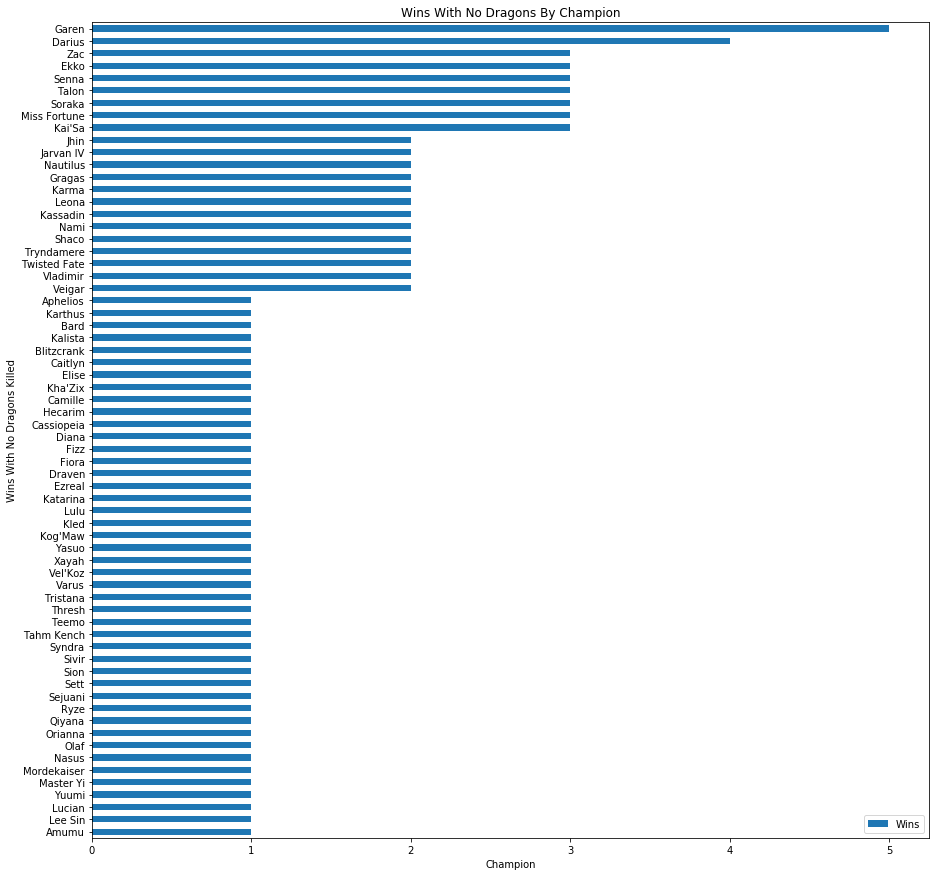

In [293]:
#Find Games with Dragonless Victories
dragonlessWins = data.loc[(data["win"] == True) & (data["dragon_kills"] == 0)]

#Compile The Champions
championsList = dragonlessWins['champion1'].to_list() + dragonlessWins['champion2'].to_list() + dragonlessWins['champion3'].to_list() + dragonlessWins['champion4'].to_list() + dragonlessWins['champion5'].to_list()
champions = pd.DataFrame(championsList, columns=['Champion'])
championSeries = champions.groupby(champions.columns.tolist(),as_index=False).size()
champions = pd.DataFrame({'Champion':championSeries.index, 'Wins':championSeries.values})

#Plot
champions.sort_values(by=['Wins']).plot.barh(x='Champion', y='Wins', rot=0)
plt.xlabel('Champion')
plt.ylabel('Wins With No Dragons Killed')
plt.gcf().set_size_inches(15, 15)
plt.title('Wins With No Dragons By Champion')
plt.show()

### Winning with First Tower and First Dragon
Here, we are analyzing matches where the victorious team killed the first tower and dragon. These are common objectives to take in the early parts of a match.

            id       version       side   win        ban1       ban2  \
3   3320843998  10.5.312.392   Side.red  True        Ekko      Shaco   
6   3320843994  10.5.312.392  Side.blue  True  Blitzcrank       Ahri   
10  3320843990  10.5.312.392  Side.blue  True        Pyke  Master Yi   

           ban3        ban4    ban5 champion1 champion2     champion3  \
3   Mordekaiser   Master Yi    Sett     Garen  Vladimir       Caitlyn   
6     Master Yi        Sett    Ornn      Ashe   Morgana       Trundle   
10      Lee Sin  Blitzcrank  Darius     Yasuo    Veigar  Miss Fortune   

   champion4    champion5  tower_kills  inhibitor_kills  dragon_kills  \
3      Senna         Kayn            9                2             2   
6    Camille  Mordekaiser            3                0             2   
10   Warwick    Gangplank           10                2             2   

    rift_herald_kills  baron_kills  first_tower  first_inhibitor  \
3                   0            0         True          

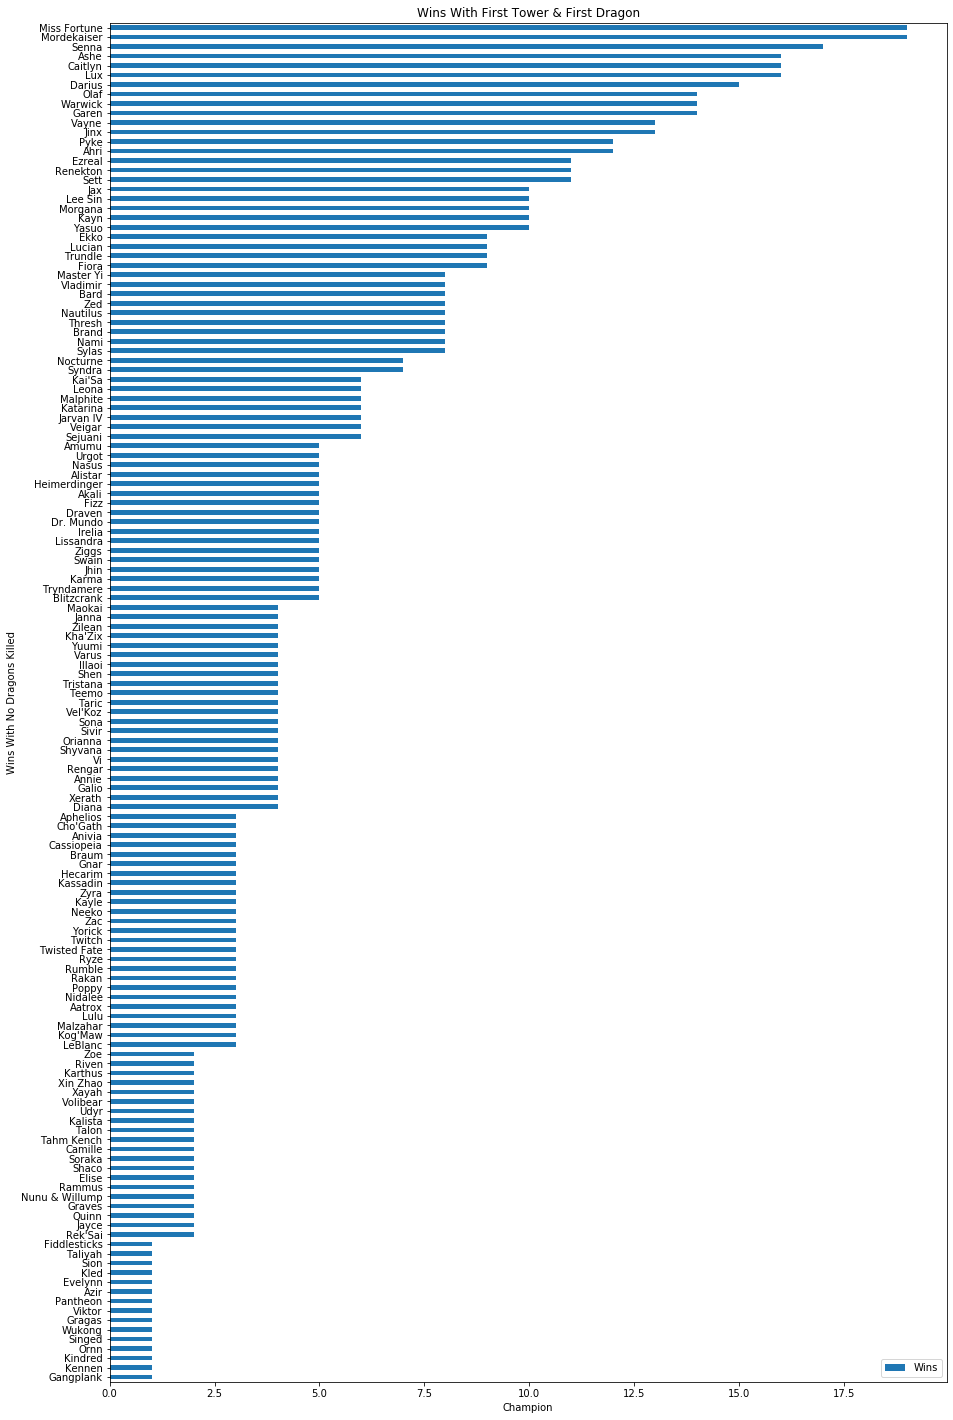

In [295]:
#Find Games with The Condition
conditionalWins = data.loc[(data["win"] == True) & (data["first_tower"] == True) & (data["first_dragon"] == True)]

print(conditionalWins.head(3))

#Compile The Champions
championsList = conditionalWins['champion1'].to_list() + conditionalWins['champion2'].to_list() + conditionalWins['champion3'].to_list() + conditionalWins['champion4'].to_list() + conditionalWins['champion5'].to_list()
champions = pd.DataFrame(championsList, columns=['Champion'])
championSeries = champions.groupby(champions.columns.tolist(),as_index=False).size()
champions = pd.DataFrame({'Champion':championSeries.index, 'Wins':championSeries.values})

#Plot
champions.sort_values(by=['Wins']).plot.barh(x='Champion', y='Wins', rot=0)
plt.xlabel('Champion')
plt.ylabel('Wins With No Dragons Killed')
plt.gcf().set_size_inches(15, 25)
plt.title('Wins With First Tower & First Dragon')
plt.show()

### Winning with baron and at least 1 inhibitor killed
Here, we are analyzing matches where the winning team killed at least 1 nexus and took at least 1 baron objective.

             id       version      side   win      ban1     ban2       ban3  \
25   3320843951  10.5.312.392  Side.red  True   Evelynn    Yasuo     Veigar   
161  3320843549  10.5.312.392  Side.red  True    Darius  Trundle    Morgana   
189  3320843425  10.5.312.392  Side.red  True  Nautilus     Sett  Master Yi   

     ban4      ban5 champion1 champion2 champion3 champion4 champion5  \
25   Ekko  Malzahar  Renekton      Ashe   Morgana   Warwick     Annie   
161  Ekko    Qiyana    Thresh  Tristana   Warwick      Sett   Nidalee   
189  Ahri  Nocturne      Ashe   Orianna   Sejuani    Rumble   Morgana   

     tower_kills  inhibitor_kills  dragon_kills  rift_herald_kills  \
25            11                4             5                  2   
161           11                5             5                  2   
189            8                2             3                  1   

     baron_kills  first_tower  first_inhibitor  first_dragon  \
25             2         True             Tru

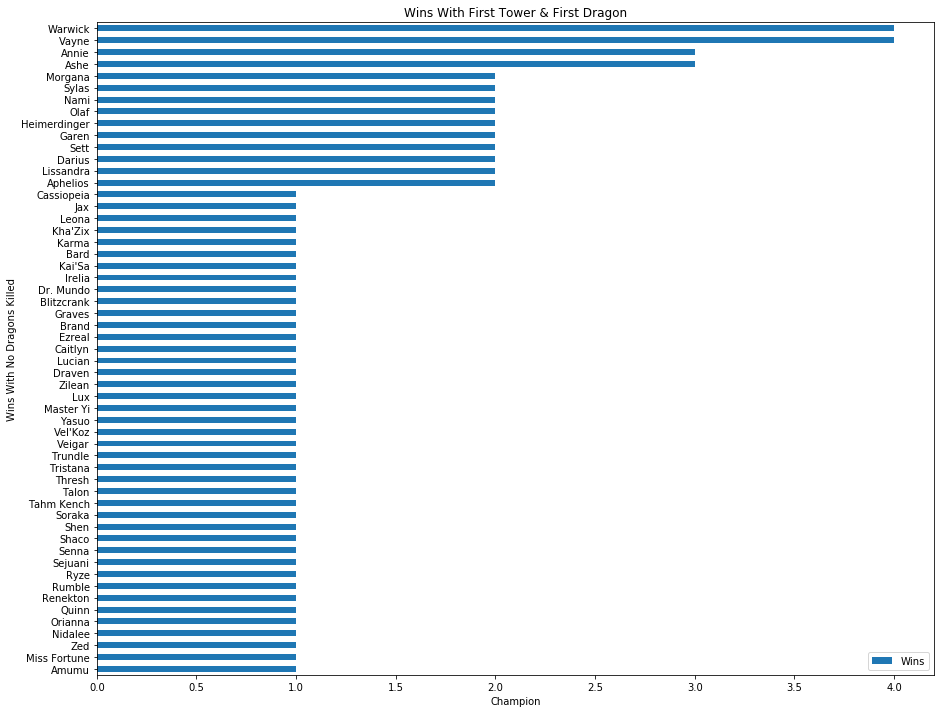

In [301]:
#Find Games with The Condition
conditionalWins = data.loc[(data["win"] == True) & (data["inhibitor_kills"] > 1) & (data["baron_kills"] > 1)]

print(conditionalWins.head(3))

#Compile The Champions
championsList = conditionalWins['champion1'].to_list() + conditionalWins['champion2'].to_list() + conditionalWins['champion3'].to_list() + conditionalWins['champion4'].to_list() + conditionalWins['champion5'].to_list()
champions = pd.DataFrame(championsList, columns=['Champion'])
championSeries = champions.groupby(champions.columns.tolist(),as_index=False).size()
champions = pd.DataFrame({'Champion':championSeries.index, 'Wins':championSeries.values})

#Plot
champions.sort_values(by=['Wins']).plot.barh(x='Champion', y='Wins', rot=0)
plt.xlabel('Champion')
plt.ylabel('Wins With No Dragons Killed')
plt.gcf().set_size_inches(15, 12)
plt.title('Wins With First Tower & First Dragon')
plt.show()

### Winning with 4 dragons
Here, we are analyzing matches where the winning team killed 4 dragons, which grants an extremely powerful buff known as "dragon "